# Estimated VAR according to Monte Carlo simulation method

The risk value of the property portfolio shows the degree of loss that may occur for a portfolio of 1 cycle (time unit), with 100%reliability (1-alpha), signed The difference is Var (K, 1-alpha) and is determined as follows: P (x <= Var (k, 1- alpha)) = Alpha

Where x is the benefits or cycle value K of the portfolio, 0 <alpha <1. Thus, if the investor holds the list after the K cycle, with 100%reliability (1-alpha), the maximum loss is | Var (K, 1- Alpha) | Under normal operating market conditions.

In this research, I used the Vietnamese stock market index data in 2022 to measure the maximum reduction in 1 day.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Loading data
data_vnindex = pd.read_excel(r'C:\Users\DPC\Desktop\project\vnindex.xlsx')
data_vnindex.head()

,date,price,open,high,low,vol,change
0,2022-01-04,1525.58,1508.55,1526.69,1507.19,891.30K,0.02
1,2022-01-05,1522.50,1525.58,1535.82,1522.50,1.06M,0.00
2,2022-01-06,1528.57,1522.50,1536.24,1518.18,1.13M,0.00
3,2022-01-07,1528.48,1534.10,1534.52,1524.96,1.03M,0.00
4,2022-01-10,1503.71,1528.48,1536.45,1503.71,1.38M,-0.02


In [21]:
# caculate mean and std of yield series
mean = data_vnindex['change'].to_numpy().mean()
std = data_vnindex['change'].to_numpy().std()
print(mean)
print(std)

-0.001285140562248996
0.015879662300547798


In [22]:
# random normal distribution
data_vnindex['normal_distribution'] = np.random.normal(loc=0, scale=1, size= len(data_vnindex))
data_vnindex.head()

,date,price,open,high,low,vol,change,normal_distribution
0,2022-01-04,1525.58,1508.55,1526.69,1507.19,891.30K,0.02,-2.233422
1,2022-01-05,1522.50,1525.58,1535.82,1522.50,1.06M,0.00,1.399361
2,2022-01-06,1528.57,1522.50,1536.24,1518.18,1.13M,0.00,0.818345
3,2022-01-07,1528.48,1534.10,1534.52,1524.96,1.03M,0.00,1.515033
4,2022-01-10,1503.71,1528.48,1536.45,1503.71,1.38M,-0.02,-1.154592


,date,price,open,high,low,vol,change,normal_distribution,yield_series
0,2022-01-04,1525.58,1508.55,1526.69,1507.19,891.30K,0.02,-2.233422,-0.036751
1,2022-01-05,1522.50,1525.58,1535.82,1522.50,1.06M,0.00,1.399361,0.020936
2,2022-01-06,1528.57,1522.50,1536.24,1518.18,1.13M,0.00,0.818345,0.011710
3,2022-01-07,1528.48,1534.10,1534.52,1524.96,1.03M,0.00,1.515033,0.022773
4,2022-01-10,1503.71,1528.48,1536.45,1503.71,1.38M,-0.02,-1.154592,-0.019620


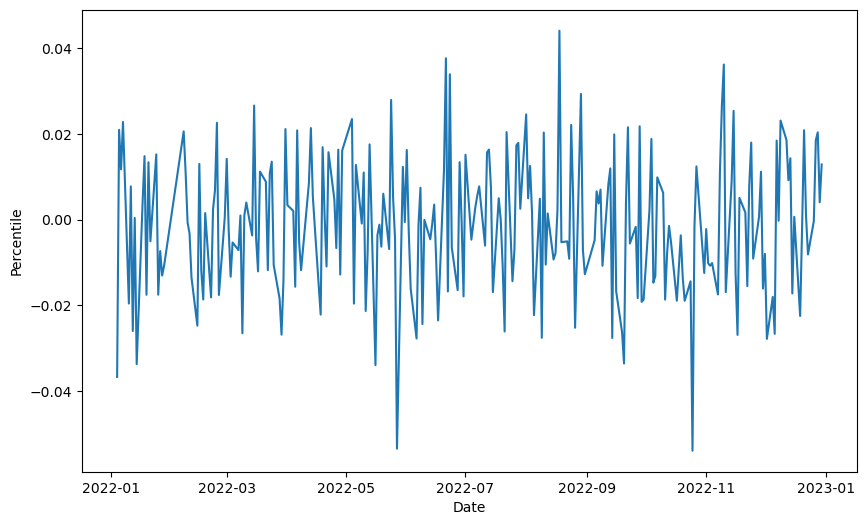

In [23]:
# yield series simulation
data_vnindex['yield_series'] = data_vnindex['normal_distribution'] * std+mean
#plot
plt.figure(figsize=(10,6))
plt.plot(data_vnindex['date'],data_vnindex['yield_series'])
plt.xlabel("Date")
plt.ylabel("Percentile")
data_vnindex.head()

In [24]:
# maximum loss in 1 day with 95% confidence
maximum_loss = np.percentile(data_vnindex['yield_series'], 5) 
print(maximum_loss)


-0.02664482130061105


Text(0, 0.5, 'Index')

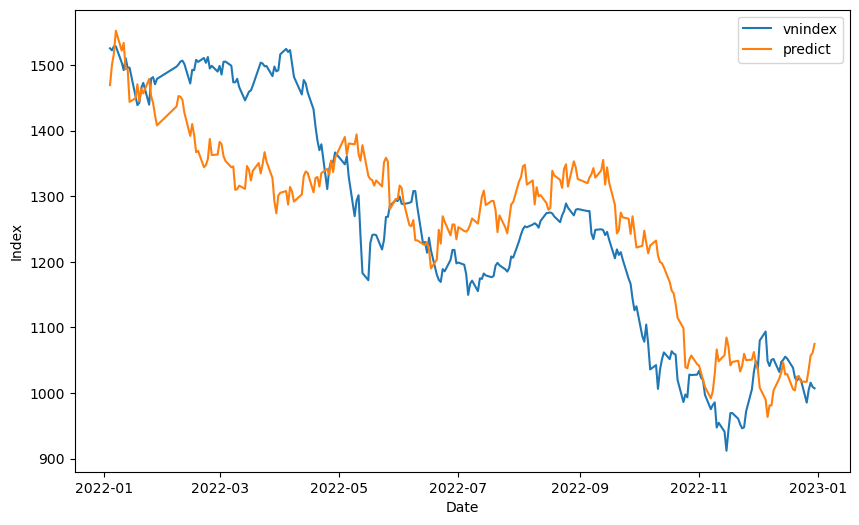

In [25]:
# simulate vnindex by monte carlo method
p = data_vnindex.iloc[0,1] * (1+data_vnindex.iloc[0,-1])
# v = list of values simulation vnindex
v = []
v.append(p)

for i in range(1,len(data_vnindex)) :
    price = v[i-1] * (1+ data_vnindex.iloc[i,-1])
    v.append(price)
#plot
plt.figure(figsize=(10,6))
plt.plot(data_vnindex['date'],data_vnindex['price'],label='vnindex')
plt.plot(data_vnindex['date'],v,label='predict' )
plt.legend(loc = 0 )
plt.xlabel("Date")
plt.ylabel("Index")

# About the Authors:

My name is Nguyen Hung Truong, I am currently a research consultant at Worldquant investment LLC. My main job is to focus on studying patterns to come up with optimal strategies in stock trading.